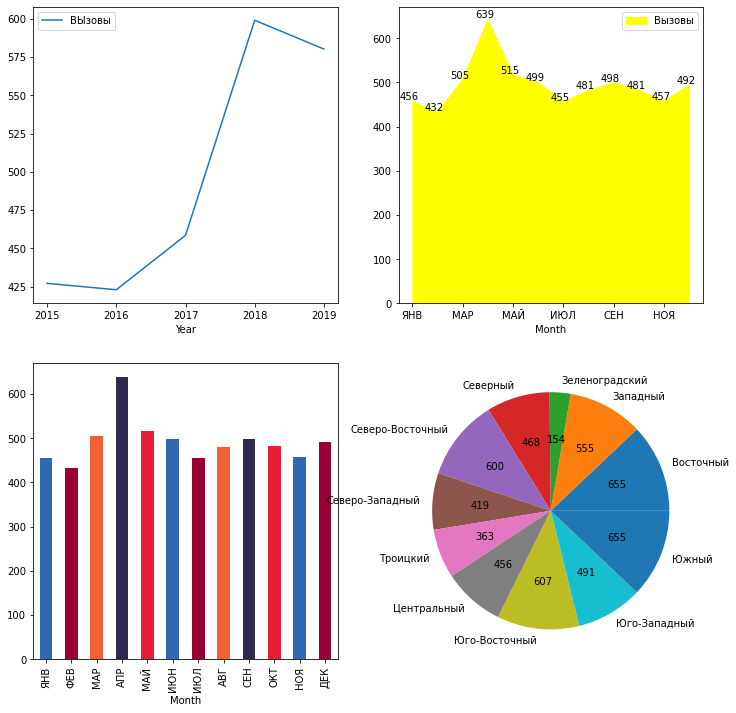

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("https://video.ittensive.com/python-advanced/data-5283-2019-10-04.utf.csv", delimiter=";")
data["Month"] = data["Month"].str.slice(0,3).str.upper()
data["AdmArea"] = data["AdmArea"].apply(lambda x: x.split(" ")[0])
years = data.groupby("Year").mean()["Calls"]
fig = plt.figure(figsize=(12, 12))
area = fig.add_subplot(2, 2, 1)
years.plot.line(ax=area, label="ВЫзовы")
area.legend()
plt.xticks(years.index)

area = fig.add_subplot(2, 2, 2)
monthes = data.groupby("Month").mean()["Calls"]
monthes = monthes.reindex(["ЯНВ","ФЕВ","МАР","АПР","МАЙ","ИЮН","ИЮЛ","АВГ","СЕН","ОКТ","НОЯ","ДЕК"])
monthes.plot.area(ax=area, label="Вызовы", color="yellow")
area.legend()
j = 0
for i in monthes:
    area.annotate(round(i), xy=(j-0.5,i*1.01))
    j += 1
    
area = fig.add_subplot(2, 2, 3)
# coolors.co
monthes.plot.bar(ax=area, label="", color=["#3068B2", "#990033", "#F46036", "#2E294E", "#E71D36"])

area = fig.add_subplot(2, 2, 4)
adm = data.groupby("AdmArea").filter(lambda x:x["Calls"].count() > 2)
adm = adm.groupby("AdmArea").mean()["Calls"]
total = sum(adm)
adm.plot.pie(ax=area, label="", autopct=lambda x: int(total * x/100))
plt.show()

In [3]:
for i in monthes:
    print(i)

455.6363636363636
431.90909090909093
504.5090909090909
639.1636363636363
515.0727272727273
498.8545454545455
454.6181818181818
480.7818181818182
497.8
481.15909090909093
456.52272727272725
492.29545454545456
